# Bike Sharing Assignment

---
## Environment Setup
---

In [1]:
# To get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import the EDA required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px

# Import the machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

# Importing VIF from statsmodels 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import the generic utility libraries

import os
import random
import datetime as dt

#Importing the function
from pandas_profiling import ProfileReport

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Set the required global options

# To display all the columns in dataframe
pd.set_option( "display.max_columns", None)
pd.set_option( "display.max_rows", None)

# Setting the display fromat
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

#pd.reset_option('display.float_format')

sns.set(style='whitegrid')

%matplotlib inline

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

---
## Data Smthing
---

- **_Reading the Bike Sharing dataset csv file_**

In [5]:
# Read the raw csv file 'day.csv' - containing the basic data of the loans
# encoding - The type of encoding format needs to be used for data reading

day = pd.read_csv('day.csv', low_memory=False)

In [6]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
day.shape

(730, 16)

In [8]:
#day['dteday'] = pd.to_datetime(day['dteday'], format='%d-%m-%Y')

In [9]:
# df = pd.DataFrame()
# df['dteday'] = day['dteday']
# df['year'] = day['dteday'].dt.year
# df['month'] = day['dteday'].dt.month
# df['day'] = day['dteday'].dt.day
# df['weekday'] = day['dteday'].dt.weekday
# df['dayname'] = day[['dteday']].apply(lambda x: dt.datetime.strftime(x['dteday'], '%A'), axis=1)
# df

#### Dataset characteristics

- day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

- **_Checking the missing values_**

In [10]:
miss = day.isna().sum()
len(miss[miss > 0])

0

_There are no missing values in the data as evident from **.isna()**_

In [11]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


---
## Data Cleaning
---

In [12]:
# Checking the values of 'instant'

day['instant'].nunique()
print(" % 3.1f%% unique values in variable instant" %(day['instant'].nunique()/len(day)*100))

730

  100.0% unique values in variable instant


In [13]:
# Checking the values of 'dteday' 

day['dteday'].nunique()
print(" % 3.2f%% unique values in variable instant" %(day['dteday'].nunique()/len(day)*100))

730

  100.00% unique values in variable instant


_Also year, month, weekday, workingday, holiday are the important metrics already derived from 'dteday' variable._ <br>
_So, the variables **'instant'** and **'dteday'** can be dropped as it contains 100% distinct values, not useful for prediction._

In [14]:
# Dropping the variables 'instant' and 'dteday'

day.drop(['instant','dteday'], axis=1, inplace=True)

In [15]:
# Dropping the variables 'casual' and 'registered' as the target variable will be 'cnt' - sum of 'casual' and 'registered'

day.drop(['casual','registered'], axis=1, inplace=True)

In [16]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
day['season_label'] = day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [18]:
day['yr_label'] = day['yr'].map({0:'2018',1:'2019'})

In [19]:
day['mnth_label'] = day['mnth'].map({1:'january',2:'feburary',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})

In [20]:
day['weekday_label'] = day['weekday'].map({0:'tuesday',1:'wednesday',2:'thursday',3:'friday',4:'saturday',5:'sunday',6:'monday'})

In [21]:
day['weathersit_label'] = day['weathersit'].map({1:'clear',2:'mist',3:'rain',4:'heavy rain'})

In [22]:
day.drop(['season','yr','mnth','weekday','weathersit'], axis=1,inplace=True)

In [23]:
day.sample(5)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_label,yr_label,mnth_label,weekday_label,weathersit_label
445,0,1,22.720847,26.57835,83.1250,7.876654,6871,summer,2019,march,saturday,clear
665,0,0,19.577500,23.38855,69.4583,26.666536,4459,winter,2019,october,tuesday,mist
617,0,1,23.916653,28.28270,50.3750,17.333771,7525,fall,2019,september,wednesday,clear
500,0,1,26.103347,29.79875,69.7917,8.208304,7424,summer,2019,may,friday,clear
283,0,1,23.233347,27.30480,80.8750,9.583814,4563,winter,2018,october,thursday,mist


- **_Checking the datatypes_**

In [24]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   holiday           730 non-null    int64  
 1   workingday        730 non-null    int64  
 2   temp              730 non-null    float64
 3   atemp             730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   season_label      730 non-null    object 
 8   yr_label          730 non-null    object 
 9   mnth_label        730 non-null    object 
 10  weekday_label     730 non-null    object 
 11  weathersit_label  730 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [25]:
# Converting the categorical variables to type 'category'

category = day.columns[7:]

day['holiday'] = day['holiday'].astype('category')
day['workingday'] = day['workingday'].astype('category')
day[category] = day[category].astype('category')

In [26]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   holiday           730 non-null    category
 1   workingday        730 non-null    category
 2   temp              730 non-null    float64 
 3   atemp             730 non-null    float64 
 4   hum               730 non-null    float64 
 5   windspeed         730 non-null    float64 
 6   cnt               730 non-null    int64   
 7   season_label      730 non-null    category
 8   yr_label          730 non-null    category
 9   mnth_label        730 non-null    category
 10  weekday_label     730 non-null    category
 11  weathersit_label  730 non-null    category
dtypes: category(7), float64(4), int64(1)
memory usage: 35.0 KB


---
## Data Analysis
---

In [27]:
day.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


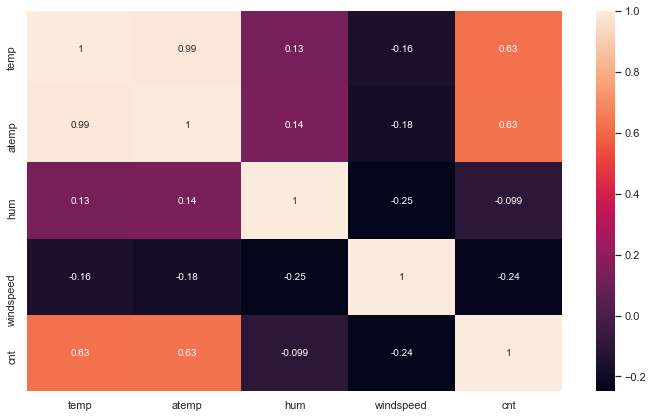

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(day.corr(), annot=True);

In [29]:
# num_dtype_ser = day.dtypes
# num_list = num_dtype_ser[num_dtype_ser == 'float64'].index
# num_list

# sns.pairplot(day[num_list])

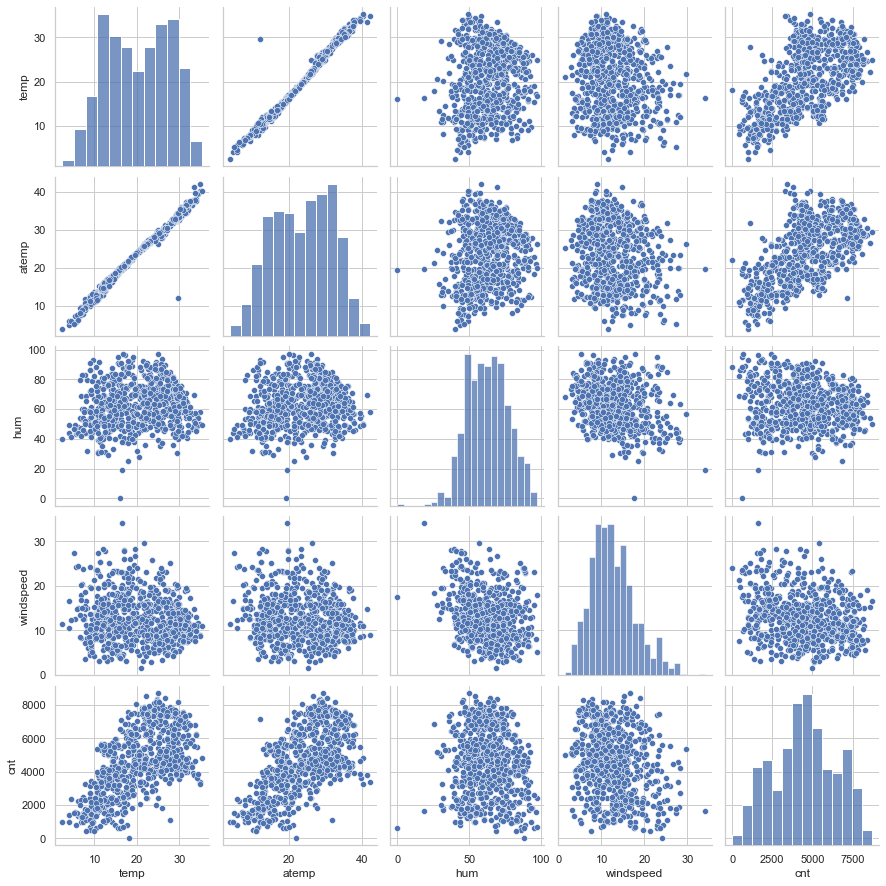

In [30]:
# Create scatterplots to visulaize the relationship between quantitave/numerical variables 

sns.pairplot(day.select_dtypes(include='number'))

**_Correlation coefficient for temp and atemp is 0.99, which is quite high and is also visible through scatter-plot_** <br>
_NOT dropping the variable temp although there is a strong correlataion between temp and atemp._ <br>
_Will be handled in Feature Selection process._

In [31]:
# Dropping the variable temp as there is a strong correlataion between temp and atemp

# day.drop(['temp'], axis=1, inplace=True)


- **_atemp variable is somewhat having a linear relationship with cnt, the target variable_** <br>
- **_cnt against hum and windspeed does not seem to have good correlation and the points are scattered all around in the plot._** <br>
    - _Also evident from heatmap, the Correlation coefficient is **-0.099 for hum vs cnt** and **-0.24 for windspeed vs cnt**, which is on a very low side._ <br>

- _**NOT Dropping the variables hum and windspeed** although, there is a **very weak correlataion between them and cnt**, the target variable._ <br>
- _Will be handled in Feature Selection process._

In [32]:
# Dropping the variable temp as there is a strong correlataion between temp and atemp

# day.drop(['hum','windspeed'], axis=1, inplace=True)

In [33]:
cat_dtype_ser = day.dtypes
category_list = cat_dtype_ser[cat_dtype_ser == 'category'].index
category_list

Index(['holiday', 'workingday', 'season_label', 'yr_label', 'mnth_label',
       'weekday_label', 'weathersit_label'],
      dtype='object')

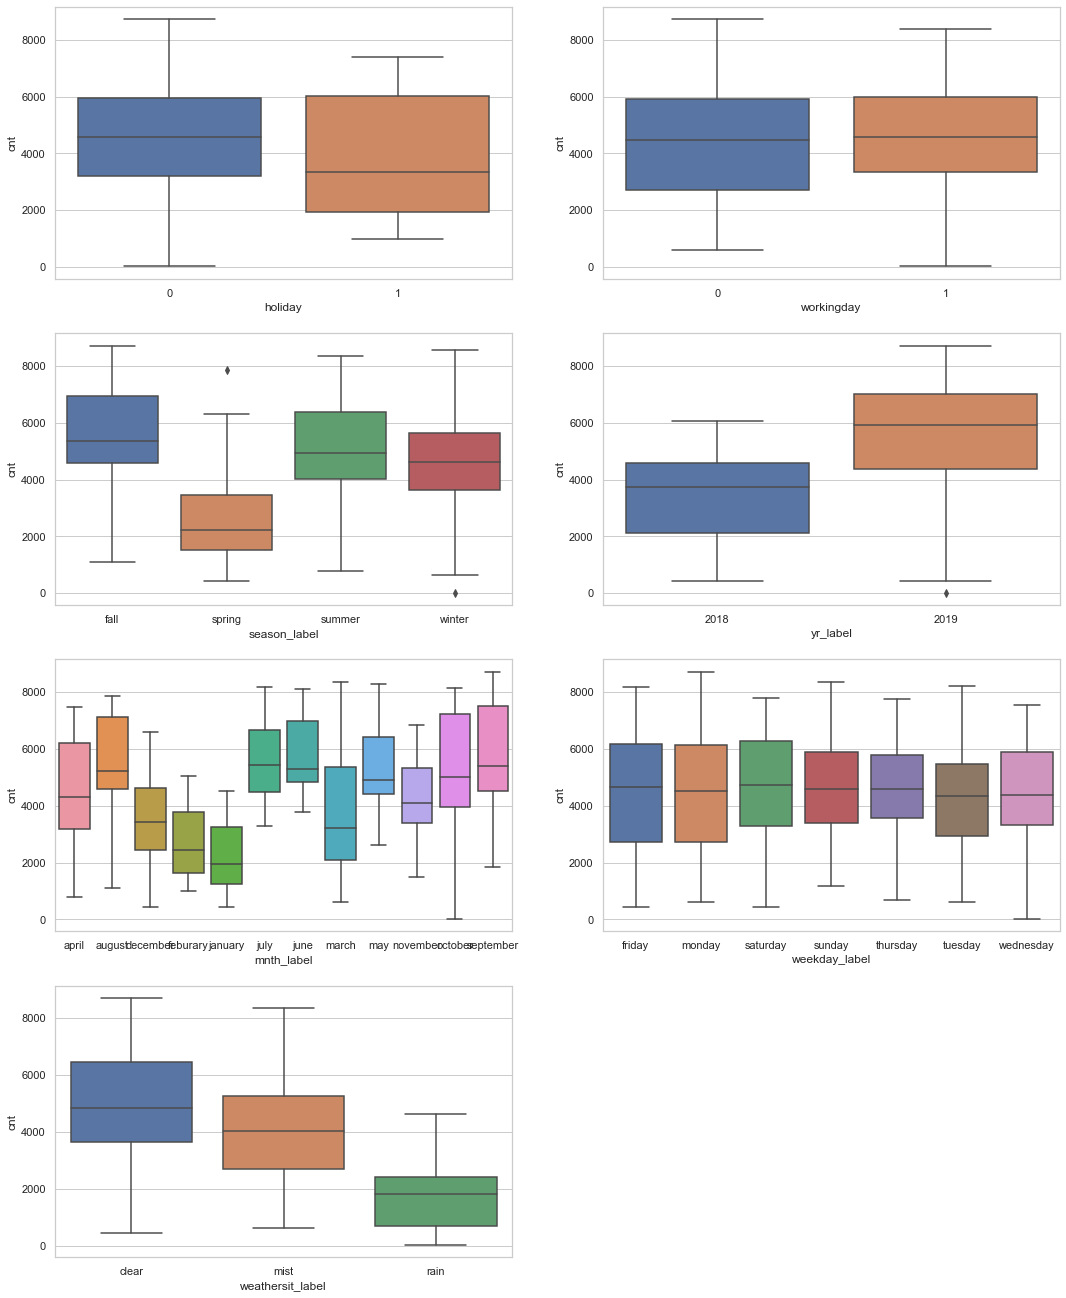

In [34]:
plt.figure(figsize=(18, 23))
for i,var in enumerate(category_list):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=var, y='cnt', data=day);
plt.show();

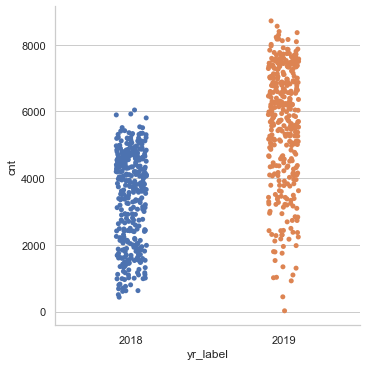

In [35]:
sns.catplot(x="yr_label", y="cnt", data=day);

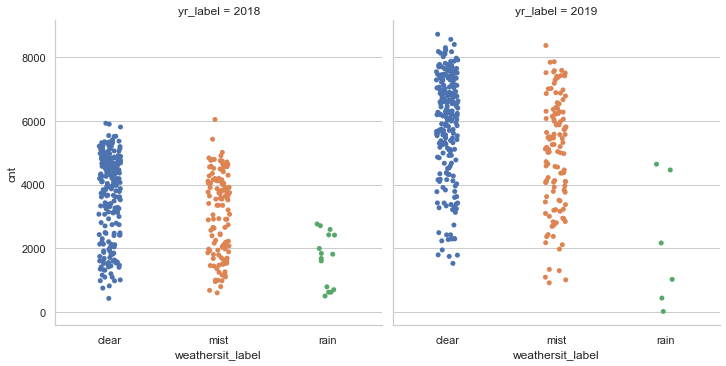

In [36]:
sns.catplot(x="weathersit_label", y="cnt",col="yr_label", data=day);

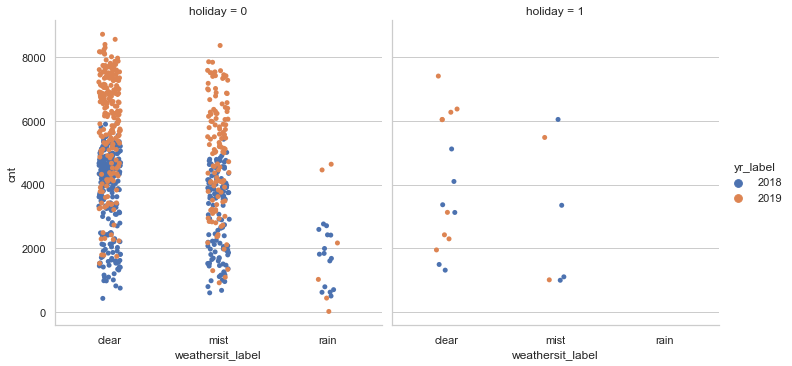

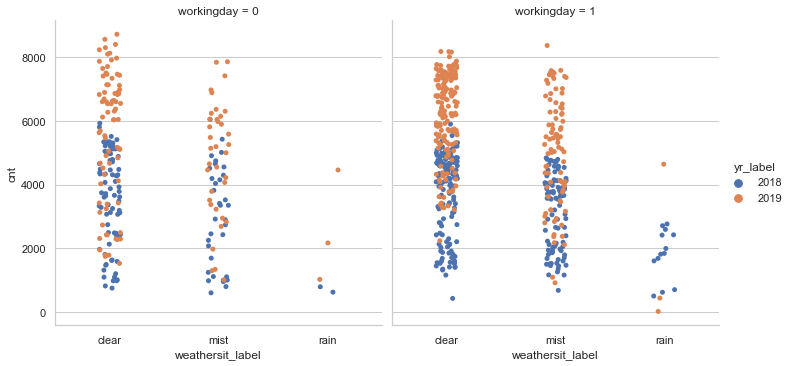

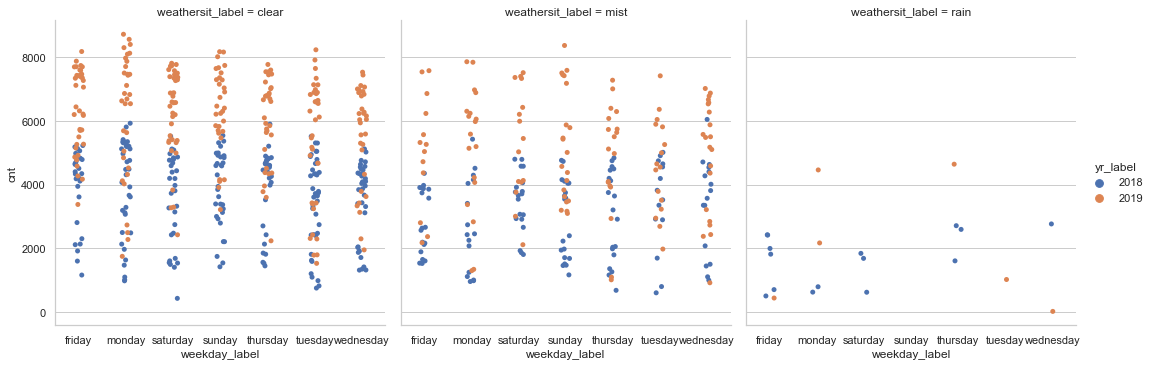

In [37]:
sns.catplot(x="weathersit_label", y="cnt", hue="yr_label",col = 'holiday', data=day);
sns.catplot(x="weathersit_label", y="cnt", hue="yr_label",col = 'workingday', data=day);
sns.catplot(x="weekday_label", y="cnt", hue="yr_label",col = 'weathersit_label', data=day);

In [38]:
category_list

Index(['holiday', 'workingday', 'season_label', 'yr_label', 'mnth_label',
       'weekday_label', 'weathersit_label'],
      dtype='object')

In [39]:
def bivariate(x_var, y_var = 'cnt', hue = 'yr_label', data = day):
    ax = sns.catplot(x=x_var, y= y_var, hue= hue, data=data)

In [40]:
# plt.figure(figsize=(18, 23));
# for i,var in enumerate(category_list):
#     bivariate(x_var=var);
# plt.show()

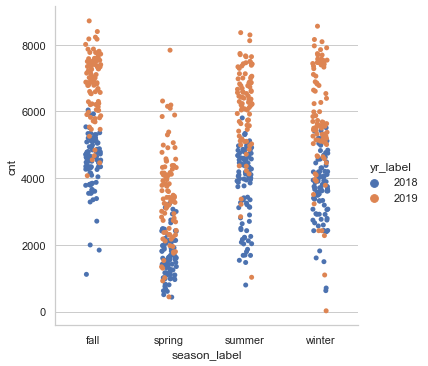

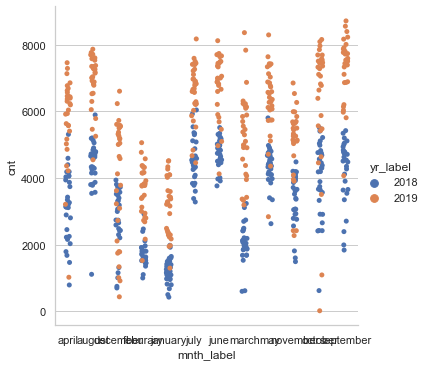

In [41]:
bivariate(x_var='season_label');
bivariate(x_var='mnth_label');

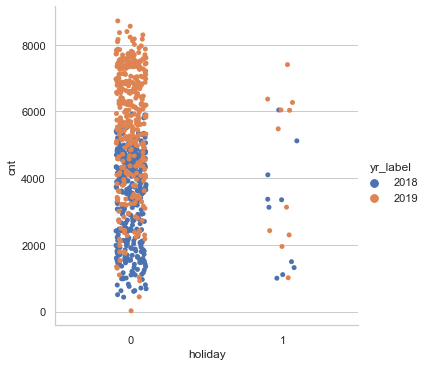

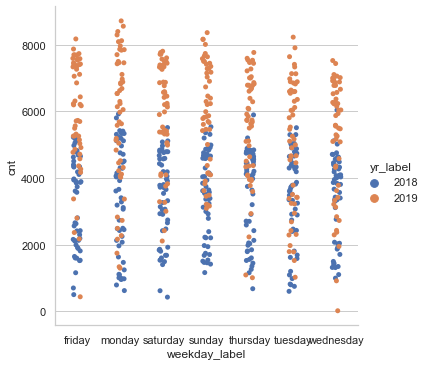

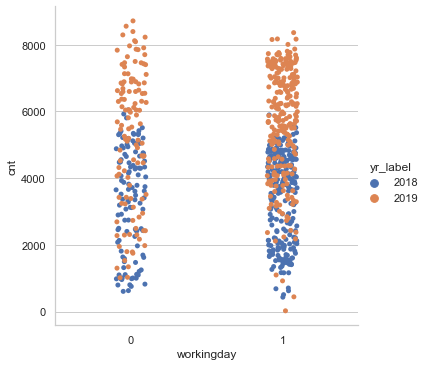

In [42]:
bivariate(x_var='holiday');
bivariate(x_var='weekday_label');
bivariate(x_var='workingday');

---
## Data Preparation for modelling
---

### Dummy Coding

In [43]:
day.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_label,yr_label,mnth_label,weekday_label,weathersit_label
0,0,0,14.110847,18.18125,80.5833,10.749882,985,spring,2018,january,monday,mist
1,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,2018,january,tuesday,mist
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,spring,2018,january,wednesday,clear
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,spring,2018,january,thursday,clear
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,spring,2018,january,friday,clear


In [44]:
# Create the dummy variables for the categorical features

# cat_var = ['season_label','yr_label','mnth_label','weekday_label','holiday','workingday','weathersit_label']

dummy = pd.get_dummies(day[category_list], drop_first = True)
dummy.sample(4)

,holiday_1,workingday_1,season_label_spring,season_label_summer,season_label_winter,yr_label_2019,mnth_label_august,mnth_label_december,mnth_label_feburary,mnth_label_january,mnth_label_july,mnth_label_june,mnth_label_march,mnth_label_may,mnth_label_november,mnth_label_october,mnth_label_september,weekday_label_monday,weekday_label_saturday,weekday_label_sunday,weekday_label_thursday,weekday_label_tuesday,weekday_label_wednesday,weathersit_label_mist,weathersit_label_rain
575,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
236,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
519,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
463,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
# df.dtypes

In [46]:
# df.describe()

In [47]:
# Dropping the original categorical features

day.drop(category_list,axis=1,inplace=True)

In [48]:
# Adding the dummy features to the original day dataframe

day = pd.concat([day,dummy], axis=1)

In [49]:
day.sample(4)

,temp,atemp,hum,windspeed,cnt,holiday_1,workingday_1,season_label_spring,season_label_summer,season_label_winter,yr_label_2019,mnth_label_august,mnth_label_december,mnth_label_feburary,mnth_label_january,mnth_label_july,mnth_label_june,mnth_label_march,mnth_label_may,mnth_label_november,mnth_label_october,mnth_label_september,weekday_label_monday,weekday_label_saturday,weekday_label_sunday,weekday_label_thursday,weekday_label_tuesday,weekday_label_wednesday,weathersit_label_mist,weathersit_label_rain
498,23.506653,27.49500,78.9583,14.250364,2843,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
24,9.162598,11.72630,61.6957,8.696332,1985,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
337,13.564153,17.45500,77.5833,5.625206,3485,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [50]:
# Checking the shape of day dataframe

day.shape

(730, 30)

### Splitting the data into training and testing sets

In [51]:
# Specify random_state so that the train and test data set always have the same rows, respectively

day_train, day_test = train_test_split(day, train_size = 0.7, random_state = 100)

In [52]:
day_train.shape

(510, 30)

In [53]:
day_test.shape

(220, 30)

_The train and test data shape looks good._

### Feature Scaling

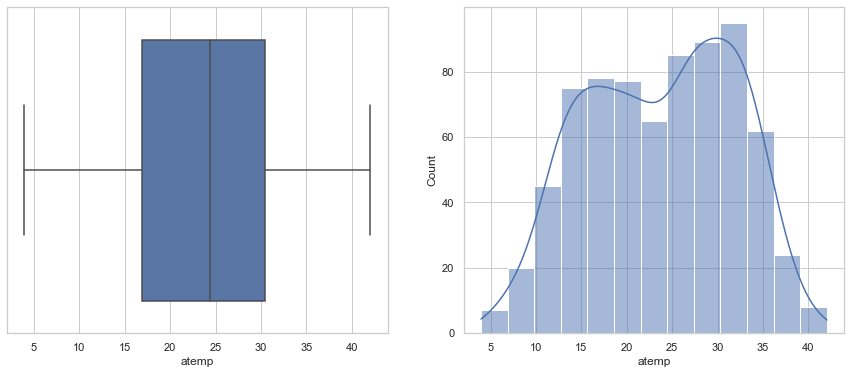

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1);
sns.boxplot(x = day.atemp);
plt.subplot(1,2,2);
sns.histplot(x = day.atemp, kde=True);

**_There are no outliers in atemp feature and so we can apply Standardized Scaling, instead of MinMax Scaling._**

In [55]:
scaler = StandardScaler()

- **_Feature scaling should be done only for numerical features and not for categorical or dummy variables_**

In [56]:
# Apply scaler() to all the variables except the 'yes-no' and 'dummy' variables.

num_vars = ['atemp', 'cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

_1. Training set should be fit as well transformed._ <br>
_2. But the testing set should never be used to fit as this dataset is not available at the time of model building (in real world scenario)._ <br>
_3. The testing set should only be transformed with the fit of training set._

In [57]:
day_train.sample(5)

,temp,atemp,hum,windspeed,cnt,holiday_1,workingday_1,season_label_spring,season_label_summer,season_label_winter,yr_label_2019,mnth_label_august,mnth_label_december,mnth_label_feburary,mnth_label_january,mnth_label_july,mnth_label_june,mnth_label_march,mnth_label_may,mnth_label_november,mnth_label_october,mnth_label_september,weekday_label_monday,weekday_label_saturday,weekday_label_sunday,weekday_label_thursday,weekday_label_tuesday,weekday_label_wednesday,weathersit_label_mist,weathersit_label_rain
460,16.536653,-0.490155,37.7083,20.125996,1.013296,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
112,18.860000,-0.123003,88.7917,15.458575,-0.230577,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
282,23.404153,0.451064,73.3750,2.834381,0.324137,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
639,24.224153,0.447402,87.1667,6.999825,0.078852,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
365,15.170000,-0.583845,69.2500,12.875189,-1.124482,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Splitting the targets into X and y sets for the model building

In [58]:
y_train = day_train.pop('cnt')
X_train = day_train

In [59]:
# y_train[10:15]
# X_train.sample(4)

---
## Building a Linear Regession Model
---

- **Algorithm Introduction:**

    - **_Linear Regression or Ordinary Least Squares Regression (OLS)_** is one of the simplest machine learning algorithms and produces both accurate and interpretable results on most types of continuous data.<br>
    - While more sophisticated algorithms like random forest will produce more accurate results, they are know as “black box” models because it’s tough for analysts to interpret the model.<br>
    - In contrast, **_OLS regression results are clearly interpretable because each predictor value (beta) is assigned a numeric value (coefficient) and a measure of significance for that variable (p-value)_**. This allows us to interpret the effect of difference predictors on the model and tune it easily.

    - Equation of linear regression<br>
        - $y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

            -  $y$ is the response
            -  $c$ is the intercept
            -  $m_1$ is the coefficient for the first feature
            -  $m_n$ is the coefficient for the nth feature<br>

    - The $m$ values are called the model **coefficients** or **model parameters**.

In [60]:
# Building a Linear Model

# By default, the statsmodels library fits a line on the dataset which passes through the origin.
# But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 
# Add a constant to get an intercept
X_train_cn = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_cn)
res = model.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
res.params

const                     -0.691932
temp                       0.052593
atemp                      0.055885
hum                       -0.006987
windspeed                 -0.026277
holiday_1                 -0.408848
workingday_1              -0.028026
season_label_spring       -0.202295
season_label_summer        0.188979
season_label_winter        0.477610
yr_label_2019              1.037190
mnth_label_august          0.099331
mnth_label_december       -0.197476
mnth_label_feburary       -0.144139
mnth_label_january        -0.281284
mnth_label_july           -0.145658
mnth_label_june            0.026815
mnth_label_march           0.006934
mnth_label_may             0.113919
mnth_label_november       -0.177602
mnth_label_october         0.034404
mnth_label_september       0.386977
weekday_label_monday      -0.006613
weekday_label_saturday    -0.017097
weekday_label_sunday       0.026302
weekday_label_thursday    -0.055940
weekday_label_tuesday     -0.248445
weekday_label_wednesday   -0

In [61]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          2.81e-180
Time:                        05:02:57   Log-Likelihood:                -235.44
No. Observations:                 510   AIC:                             528.9
Df Residuals:                     481   BIC:                             651.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- **_Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)._**

    - _We could simply drop the variable with the highest, non-significant p value. **A better way would be to cross-verify this with the VIF information.**_

- **_Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values._**

- **_Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear._**

    - _Multicollinearity will **not affect the model's output or prediction strength.**_
    - _Multicollinearity will **only affect the coefficient values** for the predictor variables by inflating their importance._

### Feature Selection with scikit learn RFE

In [62]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
# Running RFE with the output number of the variable equal to 10

# Create linear regression object
sk_model = LinearRegression()

# Train the model using the training sets
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Running RFE

# Create the RFE object
rfe = RFE(sk_model, n_features_to_select = 14)

rfe = rfe.fit(X_train, y_train)

In [65]:
# Features with rfe.support_ values

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', False, 11),
 ('atemp', True, 1),
 ('hum', False, 15),
 ('windspeed', False, 12),
 ('holiday_1', False, 4),
 ('workingday_1', True, 1),
 ('season_label_spring', True, 1),
 ('season_label_summer', False, 5),
 ('season_label_winter', True, 1),
 ('yr_label_2019', True, 1),
 ('mnth_label_august', False, 3),
 ('mnth_label_december', True, 1),
 ('mnth_label_feburary', True, 1),
 ('mnth_label_january', True, 1),
 ('mnth_label_july', False, 10),
 ('mnth_label_june', False, 2),
 ('mnth_label_march', False, 16),
 ('mnth_label_may', True, 1),
 ('mnth_label_november', True, 1),
 ('mnth_label_october', False, 13),
 ('mnth_label_september', True, 1),
 ('weekday_label_monday', True, 1),
 ('weekday_label_saturday', False, 14),
 ('weekday_label_sunday', False, 9),
 ('weekday_label_thursday', False, 8),
 ('weekday_label_tuesday', False, 6),
 ('weekday_label_wednesday', False, 7),
 ('weathersit_label_mist', True, 1),
 ('weathersit_label_rain', True, 1)]

In [66]:
# Creating a list of rfe supported features
feats = X_train.columns[rfe.support_]
feats

# Creating a list of non-supported rfe features
drop_feats = X_train.columns[~rfe.support_]
drop_feats

Index(['atemp', 'workingday_1', 'season_label_spring', 'season_label_winter',
       'yr_label_2019', 'mnth_label_december', 'mnth_label_feburary',
       'mnth_label_january', 'mnth_label_may', 'mnth_label_november',
       'mnth_label_september', 'weekday_label_monday', 'weathersit_label_mist',
       'weathersit_label_rain'],
      dtype='object')

Index(['temp', 'hum', 'windspeed', 'holiday_1', 'season_label_summer',
       'mnth_label_august', 'mnth_label_july', 'mnth_label_june',
       'mnth_label_march', 'mnth_label_october', 'weekday_label_saturday',
       'weekday_label_sunday', 'weekday_label_thursday',
       'weekday_label_tuesday', 'weekday_label_wednesday'],
      dtype='object')

### Dropping the features and updating the Model

In [67]:
X_train.shape

(510, 29)

In [68]:
# Creating X_train dataframe with RFE selected variables

X_train.drop(drop_feats,axis=1,inplace=True)

In [69]:
X_train.shape

(510, 14)

In [70]:
# Building a Linear Model

# By default, the statsmodels library fits a line on the dataset which passes through the origin.
# But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 
# Add a constant to get an intercept
X_train_cn = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_cn)
res = model.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
res.params

const                   -0.525482
atemp                    0.378906
workingday_1             0.247343
season_label_spring     -0.409435
season_label_winter      0.344951
yr_label_2019            1.055730
mnth_label_december     -0.252992
mnth_label_feburary     -0.185448
mnth_label_january      -0.298412
mnth_label_may           0.156524
mnth_label_november     -0.264034
mnth_label_september     0.326597
weekday_label_monday     0.284901
weathersit_label_mist   -0.358984
weathersit_label_rain   -1.378817
dtype: float64

In [71]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          5.81e-180
Time:                        05:02:57   Log-Likelihood:                -272.22
No. Observations:                 510   AIC:                             574.4
Df Residuals:                     495   BIC:                             638.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.52

### Checking VIF

- Variance Inflation Factor or VIF, gives a basic quantitative idea about **how much the feature variables (independent/predictor) are correlated with each other.**<br>
- It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

- $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Custom function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

def vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [74]:
# Calling the Custom function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif()

,Features,VIF
2,season_label_spring,4.07
1,workingday_1,2.81
3,season_label_winter,2.74
0,atemp,2.44
7,mnth_label_january,2.35
6,mnth_label_feburary,1.92
4,yr_label_2019,1.88
9,mnth_label_november,1.85
5,mnth_label_december,1.65
12,weathersit_label_mist,1.55


**_We generally want a VIF that is less than 5. So there are clearly no variables with VIF more than 5._**

### Dropping the feature and updating the model

As you can see from the summary, mnth_label_feburary is insignificant with p-value of `0.065`. We ll drop this variable.

In [75]:
X_train.shape

(510, 14)

In [76]:
# Dropping highly insignificant variable

X_train.drop(['mnth_label_feburary'], axis=1, inplace=True)

In [77]:
X_train.shape

(510, 13)

- Looks good.

In [78]:
# Building a Linear Model

# By default, the statsmodels library fits a line on the dataset which passes through the origin.
# But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 
# Add a constant to get an intercept
X_train_cn = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_cn)
res = model.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
res.params

const                   -0.536750
atemp                    0.390507
workingday_1             0.250172
season_label_spring     -0.477481
season_label_winter      0.340594
yr_label_2019            1.054892
mnth_label_december     -0.210994
mnth_label_january      -0.204886
mnth_label_may           0.159183
mnth_label_november     -0.243845
mnth_label_september     0.327964
weekday_label_monday     0.291371
weathersit_label_mist   -0.358886
weathersit_label_rain   -1.374321
dtype: float64

In [79]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          2.30e-180
Time:                        05:02:58   Log-Likelihood:                -273.98
No. Observations:                 510   AIC:                             576.0
Df Residuals:                     496   BIC:                             635.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.53

In [80]:
# Calling the Custom function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif()

,Features,VIF
2,season_label_spring,2.95
1,workingday_1,2.80
3,season_label_winter,2.72
0,atemp,2.36
4,yr_label_2019,1.87
8,mnth_label_november,1.82
6,mnth_label_january,1.72
11,weathersit_label_mist,1.55
5,mnth_label_december,1.53
10,weekday_label_monday,1.39


### Dropping the feature and updating the model

As you can see from the summary, mnth_label_may is less significant with p-value of `0.026`. We ll drop this variable.

In [81]:
X_train.shape

(510, 13)

In [82]:
# Dropping highly insignificant variable

X_train.drop(['mnth_label_may'], axis=1, inplace=True)

In [83]:
X_train.shape

(510, 12)

- Looks good.

In [84]:
# Building a Linear Model

# By default, the statsmodels library fits a line on the dataset which passes through the origin.
# But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 
# Add a constant to get an intercept
X_train_cn = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_cn)
res = model.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
res.params

const                   -0.505212
atemp                    0.386351
workingday_1             0.251138
season_label_spring     -0.512069
season_label_winter      0.312131
yr_label_2019            1.051336
mnth_label_december     -0.216589
mnth_label_january      -0.209364
mnth_label_november     -0.249839
mnth_label_september     0.304520
weekday_label_monday     0.286747
weathersit_label_mist   -0.351144
weathersit_label_rain   -1.381426
dtype: float64

In [85]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          1.86e-180
Time:                        05:02:58   Log-Likelihood:                -276.51
No. Observations:                 510   AIC:                             579.0
Df Residuals:                     497   BIC:                             634.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.50

In [86]:
# Calling the Custom function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif()

,Features,VIF
2,season_label_spring,2.90
3,season_label_winter,2.68
1,workingday_1,2.65
0,atemp,2.36
4,yr_label_2019,1.87
7,mnth_label_november,1.82
6,mnth_label_january,1.72
5,mnth_label_december,1.53
10,weathersit_label_mist,1.52
9,weekday_label_monday,1.37


### Dropping the feature and updating the model

As you can see from the summary, mnth_label_january is less significant with p-value of `0.012`. We ll drop this variable.

In [87]:
X_train.shape

(510, 12)

In [88]:
# Dropping highly insignificant variable

X_train.drop(['mnth_label_january'], axis=1, inplace=True)

In [89]:
X_train.shape

(510, 11)

- Looks good.

In [90]:
# Building a Linear Model

# By default, the statsmodels library fits a line on the dataset which passes through the origin.
# But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 
# Add a constant to get an intercept
X_train_cn = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_cn)
res = model.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
res.params

const                   -0.514997
atemp                    0.405448
workingday_1             0.250000
season_label_spring     -0.558804
season_label_winter      0.313626
yr_label_2019            1.048773
mnth_label_december     -0.173966
mnth_label_november     -0.227375
mnth_label_september     0.303811
weekday_label_monday     0.284672
weathersit_label_mist   -0.354800
weathersit_label_rain   -1.364976
dtype: float64

In [91]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.8
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          2.99e-180
Time:                        05:02:58   Log-Likelihood:                -279.79
No. Observations:                 510   AIC:                             583.6
Df Residuals:                     498   BIC:                             634.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.51

In [92]:
# Calling the Custom function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif()

,Features,VIF
3,season_label_winter,2.68
1,workingday_1,2.64
2,season_label_spring,2.61
0,atemp,2.22
4,yr_label_2019,1.87
6,mnth_label_november,1.81
9,weathersit_label_mist,1.52
5,mnth_label_december,1.47
8,weekday_label_monday,1.37
7,mnth_label_september,1.15


### Dropping the feature and updating the model

As you can see from the summary, mnth_label_december is less significant with p-value of `0.027`. We ll drop this variable.

In [93]:
X_train.shape

(510, 11)

In [94]:
# Dropping highly insignificant variable

X_train.drop(['mnth_label_december'], axis=1, inplace=True)

In [95]:
X_train.shape

(510, 10)

- Looks good.

In [96]:
# Building a Linear Model

# By default, the statsmodels library fits a line on the dataset which passes through the origin.
# But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 
# Add a constant to get an intercept
X_train_cn = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_cn)
res = model.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
res.params

const                   -0.524849
atemp                    0.417784
workingday_1             0.247689
season_label_spring     -0.553639
season_label_winter      0.260494
yr_label_2019            1.050096
mnth_label_november     -0.157389
mnth_label_september     0.316131
weekday_label_monday     0.280003
weathersit_label_mist   -0.351769
weathersit_label_rain   -1.344713
dtype: float64

In [97]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          2.17e-180
Time:                        05:02:58   Log-Likelihood:                -282.29
No. Observations:                 510   AIC:                             586.6
Df Residuals:                     499   BIC:                             633.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.52

In [98]:
# Calling the Custom function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif()

,Features,VIF
1,workingday_1,2.61
2,season_label_spring,2.61
3,season_label_winter,2.22
0,atemp,2.16
4,yr_label_2019,1.87
5,mnth_label_november,1.57
8,weathersit_label_mist,1.52
7,weekday_label_monday,1.36
6,mnth_label_september,1.14
9,weathersit_label_rain,1.07


### Dropping the feature and updating the model

As you can see from the summary, mnth_label_november is less significant with p-value of `0.052`. We ll drop this variable.

In [99]:
X_train.shape

(510, 10)

In [100]:
# Dropping highly insignificant variable

X_train.drop(['mnth_label_november'], axis=1, inplace=True)

In [101]:
X_train.shape

(510, 9)

- Looks good.

In [102]:
# Building a Linear Model

# By default, the statsmodels library fits a line on the dataset which passes through the origin.
# But in order to have an intercept, we need to manually use the add_constant attribute of statsmodels. 
# Add a constant to get an intercept
X_train_cn = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
model = sm.OLS(y_train, X_train_cn)
res = model.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
res.params

const                   -0.535653
atemp                    0.425022
workingday_1             0.250853
season_label_spring     -0.539466
season_label_winter      0.213350
yr_label_2019            1.049855
mnth_label_september     0.327203
weekday_label_monday     0.285904
weathersit_label_mist   -0.347975
weathersit_label_rain   -1.334692
dtype: float64

In [103]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.7
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          8.71e-181
Time:                        05:02:58   Log-Likelihood:                -284.22
No. Observations:                 510   AIC:                             588.4
Df Residuals:                     500   BIC:                             630.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.53

In [104]:
# Calling the Custom function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif()

,Features,VIF
1,workingday_1,2.61
2,season_label_spring,2.60
0,atemp,2.13
4,yr_label_2019,1.87
3,season_label_winter,1.74
7,weathersit_label_mist,1.52
6,weekday_label_monday,1.36
5,mnth_label_september,1.14
8,weathersit_label_rain,1.07


### Visualising the data with a scatter plot and the fitted regression line

---
## Residual Analysis
---

- **_Residual Analysis needs to be done to validate assumptions of the model, and hence the reliability for inference._**

### Distribution of the Error terms
- We need to check if the error terms are also normally distributed (which is one of the major assumptions of linear regression).
- Plotting a histogram of the error terms and see what it looks like.

In [105]:
y_train_pred = res.predict(X_train_cn)
# y_train_pred.head()

In [106]:
# Calculating the residuals

residuals = (y_train - y_train_pred)

In [107]:
# Plot the histogram of the error terms/residuals

# plt.figure(figsize=(11,7))
# sns.distplot(residuals, hist=True)
# plt.title('Residuals Analysis', fontsize = 24)                 # Plot heading 
# plt.xlabel('Errors / Residuals', fontsize = 12);                    # X-label

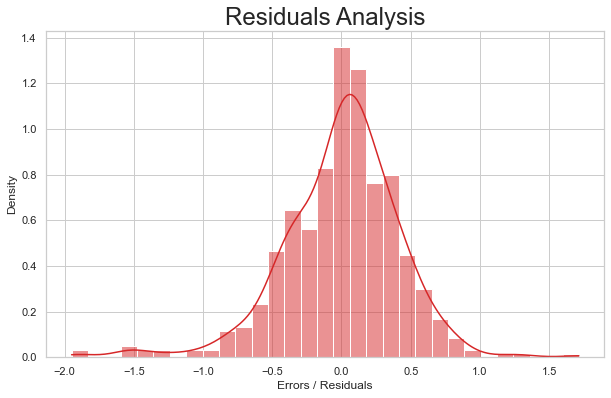

In [108]:
# Plot the histogram of the error terms/residuals

plt.figure(figsize=(10,6))
sns.histplot(residuals, stat="density", kde=True, color='#d62728')
plt.title('Residuals Analysis', fontsize = 24)                 # Plot heading 
plt.xlabel('Errors / Residuals', fontsize = 12);                    # X-label

**_We can conclude that the Error terms/Residuals follow a Normal-Distribution curve._**

- **_Normal distribution of the residuals can be validated by plotting a q-q plot._**

- **_Using the q-q plot we can infer if the data comes from a normal distribution._**
- **_If yes, the plot would show fairly straight line. Absence of normality in the errors can be seen with deviation in the straight line._**

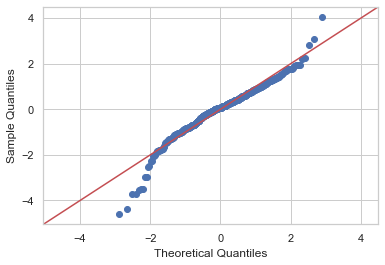

In [109]:
residuals_fit = res.resid
fig = sm.qqplot(residuals_fit, fit=True, line='45')
plt.show()

**_The q-q plot of the bike sharing data set shows that the errors(residuals) are fairly normally distributed._**

### Homoscedasticity Assumption

- _**Homoscedasticity** describes a situation in which the **error term** (that is, the “noise” or random disturbance in the relationship between the features and the target) **is the same across all values of the independent variables.**_
- A scatter plot of residual values vs predicted values is a goodway to check for homoscedasticity.There should be **no clear pattern in the distribution** and **if there is a specific pattern,the data is heteroscedastic.**

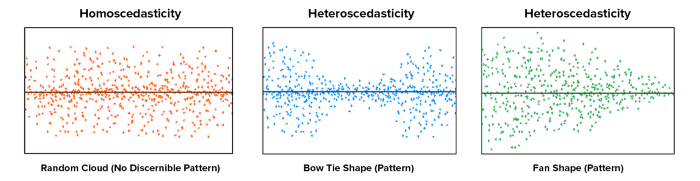

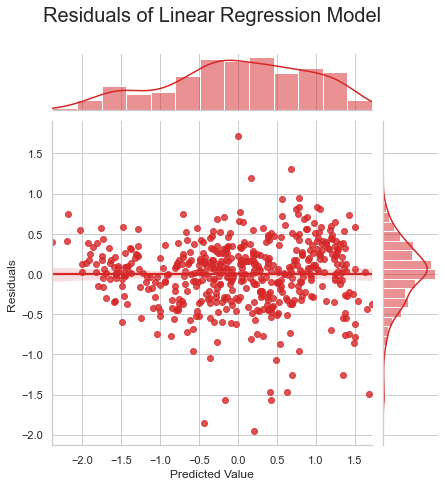

In [110]:
# Predicting the y_train
y_train_pred = res.predict(X_train_cn)

# Calculating the residuals
residuals = (y_train - y_train_pred)

# Visualizing the residuals and predicted value on train set
# plt.figure(figsize=(25,12))
sns.jointplot(x = y_train_pred, y = residuals, kind='reg', color='#d62728')
plt.title('Residuals of Linear Regression Model', fontsize = 20, pad = 100) # Plot heading 
plt.xlabel('Predicted Value', fontsize = 12)                     # X-label
plt.ylabel('Residuals', fontsize = 12);                          # Y-label

**_Homoscedasticity Assumption holds true, as there is no clear pattern in the distribution_**

### Little or No autocorrelation in the residuals

- Autocorrelation occurs when the residual errors are dependent on each other.The presence of correlation in error terms drastically reduces model’s accuracy.

- **Autocorrelation** can be tested with the help of **Durbin-Watson test**.The null hypothesis of the test is that there is no serial correlation.

- The test statistic is approximately equal to **2*(1-r)** where **r is the sample autocorrelation of the residuals**. Thus, **for r == 0, indicating no serial correlation, the test statistic equals 2**. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

- In our summary results, **Durbin-Watson is 2.065**, which tells us that the **residuals are not correlated**.

---
## Making Predictions using the Final Model
---

### Applying the scaling on the test sets

In [111]:
# Apply scaler() to all the variables except the 'yes-no' and 'dummy' variables.
# scaler = StandardScaler() - scaler object is already instantiated while scaling train set

num_vars = ['atemp', 'cnt']

day_test[num_vars] = scaler.transform(day_test[num_vars])

In [112]:
# day_test.head()

### Splitting into X_test and y_test

In [113]:
y_test = day_test.pop('cnt')
X_test = day_test

### Predict the target

In [114]:
# Now let's use our model to make predictions.

# Creating X_test dataframe by dropping variables from X_test
X_test = X_test[X_train.columns]

# Adding a constant variable 
X_test_cn = sm.add_constant(X_test)

# Making predictions
y_pred = res.predict(X_test_cn)

---
## Model Evaluation
---

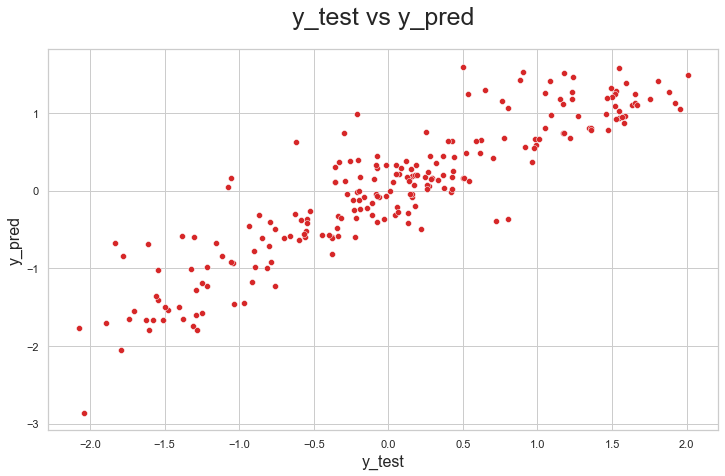

In [129]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(12,7))
sns.scatterplot(x = y_test, y = y_pred, color='#d62728')
plt.title('y_test vs y_pred', fontsize=25, pad = 25)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16);                          # Y-label

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Looking at the RMSE

In [132]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.42162390366923597

### Checking the R-squared on the test set

In [133]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8131182604982332